# **Assignment #06**
# **Hope to Skills**

# **Question 1: Explain the basic structure and working of a simple Artificial Neural Network (ANN).**

In your explanation, include the following points:

● The role of neurons and layers in an ANN.

● How information flows through the network.

● The significance of activation functions and provide examples of commonly used activation
functions.

● The concept of weights and biases and their role in training an ANN.

# 1. **Role of Neurons and Layers in an ANN**
An Artificial Neural Network (ANN) is inspired by the biological neural networks in the human brain. It consists of interconnected nodes or "neurons" organized into layers. The basic structure includes:

**Input Layer:** This layer receives the input data. Each neuron in this layer represents an attribute or feature of the input data.

**Hidden Layer(s):** These layers are situated between the input and output layers. They perform computations and extract features from the input data. There can be one or multiple hidden layers in an ANN.

**Output Layer:** This layer produces the final output of the network. The number of neurons in this layer corresponds to the number of output classes or the dimensionality of the output data.
Each neuron in one layer is typically connected to every neuron in the next layer, forming a dense or fully connected network.

2. **How Information Flows Through the Network**
Information in an ANN flows in a forward direction, from the input layer through the hidden layers to the output layer. This process is known as forward propagation. Here is a step-by-step outline:

**Input Data:** Each input feature is fed into the input neurons.
Weighted Sum: For each neuron in the hidden layers, the input values are multiplied by corresponding weights, summed up, and added to a bias term.
𝑧
=
∑
𝑖
(
𝑤
𝑖
⋅
𝑥
𝑖
)
+
𝑏
z=
i
∑
​
 (w
i
​
 ⋅x
i
​
 )+b

where
𝑤
𝑖
w
i
​
  are the weights,
𝑥
𝑖
x
i
​
  are the inputs, and
𝑏
b is the bias.
**Activation Function: **The weighted sum
𝑧
z is then passed through an activation function to introduce non-linearity into the model.
𝑎
=
𝜎
(
𝑧
)
a=σ(z)
**Propagation**: The output of the activation function becomes the input for the next layer. This process continues until the output layer is reached.
3. Significance of Activation Functions
Activation functions are crucial as they determine the output of a neuron by introducing non-linearity. Without non-linearity, the network would behave like a simple linear regression model, regardless of its depth. Commonly used activation functions include:

Sigmoid Function:

𝜎
(
𝑧
)
=
1
1
+
𝑒
−
𝑧
σ(z)=
1+e
−z

1
​

It maps any input to a value between 0 and 1, making it useful for binary classification.

Hyperbolic Tangent (Tanh):

tanh
(
𝑧
)
=
𝑒
𝑧
−
𝑒
−
𝑧
𝑒
𝑧
+
𝑒
−
𝑧
tanh(z)=
e
z
 +e
−z

e
z
 −e
−z

​

It maps inputs to a value between -1 and 1, and is zero-centered.

ReLU (Rectified Linear Unit):

ReLU
(
𝑧
)
=
max
⁡
(
0
,
𝑧
)
ReLU(z)=max(0,z)
It introduces sparsity in the network by activating only certain neurons, thus reducing the likelihood of vanishing gradients.

Leaky ReLU:

Leaky ReLU
(
𝑧
)
=
max
⁡
(
0.01
𝑧
,
𝑧
)
Leaky ReLU(z)=max(0.01z,z)
It allows a small gradient when the unit is not active, addressing the dying ReLU problem.

4. Concept of Weights and Biases and Their Role in Training an ANN
Weights and biases are the primary parameters learned during the training process:

Weights: Each connection between neurons has an associated weight. These weights determine the strength and direction (positive or negative) of the influence one neuron has on another. During training, weights are adjusted to minimize the error in the network's predictions.

Biases: Each neuron has an associated bias that is added to the weighted sum of inputs. Biases allow the activation function to be shifted to the left or right, enabling the network to fit the data better.

Training an ANN
Training involves adjusting the weights and biases to minimize the error between the predicted output and the actual output. This process typically uses the following steps:

Forward Propagation: Compute the output of the network for given inputs.
Loss Calculation: Calculate the loss (or error) using a loss function, such as Mean Squared Error (MSE) for regression or Cross-Entropy Loss for classification.
Backward Propagation: Compute the gradient of the loss with respect to each weight and bias using the chain rule of calculus. This is done through a process called backpropagation.
Weight and Bias Update: Adjust the weights and biases using an optimization algorithm like Gradient Descent:
𝑤
=
𝑤
−
𝜂
∂
Loss
∂
𝑤
w=w−η
∂w
∂Loss
​


𝑏
=
𝑏
−
𝜂
∂
Loss
∂
𝑏
b=b−η
∂b
∂Loss
​


where
𝜂
η is the learning rate.
These steps are repeated iteratively over multiple epochs until the network's performance is satisfactory.

Conclusion
The basic structure and working of an ANN involve a network of neurons arranged in layers. Information flows through the network via forward propagation, with activation functions introducing non-linearity. Weights and biases are adjusted during training to minimize the error, enabling the network to learn from the data and make accurate predictions.







# **Question 2:** Build a FCNN to recognize handwritten digits. Use MNIST handwritten digit data set.
Your network should have:

● An input layer of size 784 (28x28 pixels)

● Two hidden layers with 128 neurons each and ReLU activation

● An output layer with 10 neurons (one for each digit) and softmax activation (Use accuracy as
an error measure).

# **Load the MNIST dataset**

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

#Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


# **Display the Image**

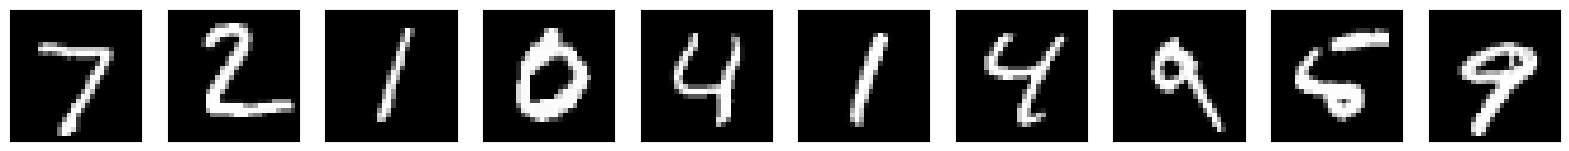

In [ ]:
import matplotlib.pyplot as plt

# Number of images to display
n = 10

# Create a figure to display the images
plt.figure(figsize=(20, 4))

# Loop through the first 'n' images
for i in range(n):
    # Create a subplot within the figure
    ax = plt.subplot(2, n, i + 1)

    # Display the original image
    plt.imshow(X_test[i].reshape(28, 28))

    # Set colormap to grayscale
    plt.gray()

    # Hide x-axis and y-axis labels and ticks
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Show the figure with the images
plt.show()

# Close the figure
plt.close()


# **Normalize the Pixel**

In [ ]:
# Normalize the pixel values (0 to 255) to (0 to 1)
X_train = X_train.astype('float32') / 255.0
X_test =X_test.astype('float32') / 255.0

# **Flatten the images**

In [ ]:
# Flatten the images from 28x28 to 784
X_train =X_train.reshape(-1, 28*28)
X_test =X_test.reshape(-1, 28*28)

# **One Hot  Encoding**

In [ ]:

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# **neural network architecture**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

#definw the model
model =Sequential([
    Dense(128, activation ='relu', input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# **Compile the model**

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# **Train the model**

In [ ]:
model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.2)


Epoch 1/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0176 - accuracy: 0.9939 - val_loss: 0.1173 - val_accuracy: 0.9762
Epoch 2/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0151 - accuracy: 0.9947 - val_loss: 0.1191 - val_accuracy: 0.9775
Epoch 3/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0142 - accuracy: 0.9949 - val_loss: 0.1236 - val_accuracy: 0.9761
Epoch 4/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0128 - accuracy: 0.9959 - val_loss: 0.1401 - val_accuracy: 0.9741
Epoch 5/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0113 - accuracy: 0.9965 - val_loss: 0.1466 - val_accuracy: 0.9734
Epoch 6/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0137 - accuracy: 0.9954 - val_loss: 0.1393 - val_accuracy: 0.9753
Epoch 7/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0128 - accuracy: 0.9956 - val_loss: 0.1430 - val_accuracy:

# **Evaluate the model**

In [ ]:
test_loss, test_accuracy =model.evaluate(X_test, y_test)
print('Test accuracy:  {test_accuracy}')

313/313 [==============================] - 1s 2ms/step - loss: 0.1542 - accuracy: 0.9783
Test accuracy:  {test_accuracy}


In [ ]:
# Import the necessary libraries
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Predict probabilities for the test set using the trained model
y_pred_probs = model.predict(X_test, verbose=0)
y_pred = np.where(y_pred_probs > 0.5, 1, 0)

# Calculate and print the test accuracy using predicted and true labels
test_accuracy = accuracy_score(y_pred, y_test)
print("\nTest accuracy: {}".format(test_accuracy))



Test accuracy: 0.9782


In [ ]:
# Define a mask for selecting a range of indices (20 to 49)
mask = range(20, 50)

# Select the first 20 samples from the test set for visualization
X_valid = X_test[0:20]
actual_labels = y_test[0:20]

# Predict probabilities for the selected validation samples
y_pred_probs_valid = model.predict(X_valid)
y_pred_valid = np.where(y_pred_probs_valid > 0.5, 1, 0)


1/1 [==============================] - 0s 34ms/step


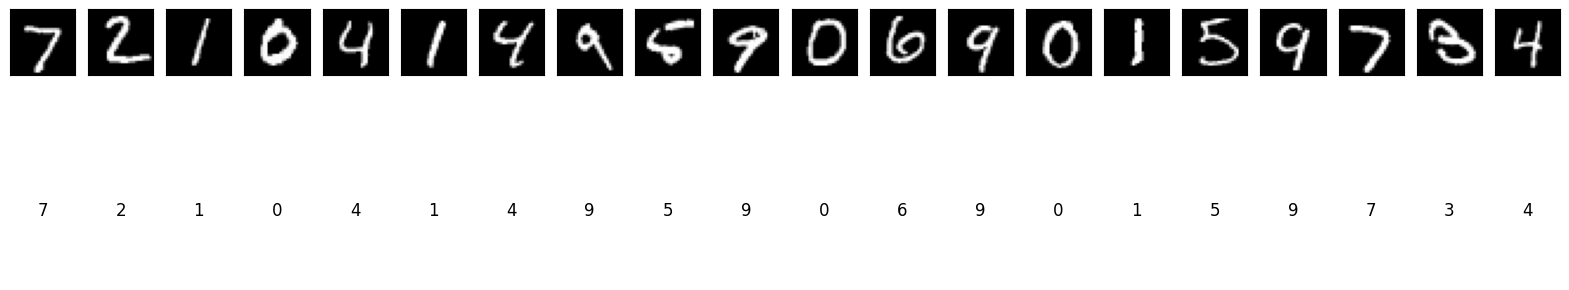

In [ ]:
# Set up a figure to display images
n = len(X_valid)
plt.figure(figsize=(20, 4))

for i in range(n):
    # Display the original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_valid[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display the predicted digit
    predicted_digit = np.argmax(y_pred_probs_valid[i])
    ax = plt.subplot(2, n, i + 1 + n)
    plt.text(0.5, 0.5, str(predicted_digit), fontsize=12, ha='center', va='center')
    plt.axis('off')

# Show the plotted images
plt.show()

# Close the plot
plt.close()


# **Question 3:** Explain the importance of hyperparameter tuning in training an ANN. List at least
three hyperparameters commonly tuned in ANN training and describe their impact on the
model's performance.

**Hyperparameter** tuning plays a crucial role in training an Artificial Neural Network (ANN) as it directly impacts the model's performance, convergence speed, and generalization ability. Here's an explanation of its importance along with three commonly tuned hyperparameters and their impact on model performance:

# **Importance of Hyperparameter Tuning:**
Optimal Model Performance: Hyperparameters control the architecture and behavior of the neural network. Tuning these parameters ensures that the model is configured in a way that best captures the underlying patterns in the data, leading to improved performance metrics such as accuracy, precision, recall, or F1-score.

# **Preventing Overfitting and Underfitting:**
Hyperparameters influence the complexity of the model. Proper tuning helps prevent overfitting (model memorizing the training data) or underfitting (model failing to capture the underlying patterns) by finding the right balance between model complexity and generalization.

# **Faster Convergence:**

 Tuning hyperparameters can lead to faster convergence during training. Optimizing parameters like learning rate and batch size can help the model converge to an optimal solution more quickly, reducing training time and computational resources.

# **Robustness and Stability:**

 Well-tuned hyperparameters result in a more robust and stable model. A robust model performs consistently across different datasets or under various conditions, making it suitable for real-world applications.

# **Commonly Tuned Hyperparameters:**


# **Learning Rate Impact:**

 Learning rate controls the step size or the rate at which the model parameters are updated during training. A higher learning rate may lead to faster convergence but risks overshooting the optimal solution, while a lower learning rate may slow down convergence.

# **Optimization:**

Tuning the learning rate involves finding a value that allows the model to converge quickly without oscillating around the optimal solution or getting stuck in local minima.

# **Number of Hidden Units or Layers:**

Impact: The number of hidden units or layers determines the complexity and capacity of the neural network. Increasing the number of units or layers can improve the model's ability to capture complex patterns in the data, but it also increases the risk of overfitting.
Optimization: Finding the optimal number of hidden units or layers involves balancing model complexity with the risk of overfitting. This can be done through techniques like cross-validation or model selection.

# **Activation Functions:**

**Impact:**
Activation functions introduce non-linearity into the neural network, allowing it to learn complex relationships in the data. Different activation functions have different properties and may be more suitable for specific types of data or tasks.

**Optimization:**

Selecting the appropriate activation functions involves experimenting with various options (e.g., ReLU, sigmoid, tanh) and evaluating their performance on validation data. The choice may depend on the task, network architecture, and the presence of vanishing or exploding gradients.
By carefully tuning these hyperparameters, practitioners can fine-tune the neural network to achieve optimal performance, robustness, and generalization ability, making it suitable for real-world applications.







# **Question 4:**
 Write a Python script to create and compare the performance of an ANN using
different activation functions (ReLU, Sigmoid, and Tanh) for the hidden layers. Use a simple
dataset (e.g., Iris dataset) to train and evaluate the models. Report the accuracy for each
activation function.

# **Import Library**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.utils import to_categorical

# **Load the Iris dataset**

In [ ]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# One-hot encode the labels
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y.reshape(-1, 1))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# **create and compile the model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_model(activation_function):
    model = Sequential()
    model.add(Dense(10, activation=activation_function, input_shape=(X_train.shape[1],)))
    model.add(Dense(10, activation=activation_function))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


# **Train and evaluate the models using different activation functions**

In [ ]:
# Define the activation functions to test
activation_functions = ['relu', 'sigmoid', 'tanh']

# Dictionary to store the accuracy results
results = {}

# Train and evaluate models with different activation functions
for activation in activation_functions:
    print(f"Training model with {activation} activation function...")
    model = create_model(activation)
    model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0, validation_split=0.2)
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    results[activation] = accuracy
    print(f"Test accuracy with {activation} activation: {accuracy:.4f}")


Training model with relu activation function...
Test accuracy with relu activation: 0.9333
Training model with sigmoid activation function...
Test accuracy with sigmoid activation: 0.9000
Training model with tanh activation function...
Test accuracy with tanh activation: 0.9667


## **Accuracy for each activation function**

In [ ]:
# Print the accuracy results
print("\nAccuracy results for different activation functions:")
for activation, accuracy in results.items():
    print(f"{activation}: {accuracy:.4f}")



Accuracy results for different activation functions:
relu: 0.9333
sigmoid: 0.9000
tanh: 0.9667


# **Question 5:**
 Weather Prediction Using Fully Connected Neural Networks.

# **Load Historical Weather Data**

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/Weather Training Data.csv')

# Display the first few rows of the dataframe
print(data.head())


  row ID Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0   Row0   Albury     13.4     22.9       0.6          NaN       NaN   
1   Row1   Albury      7.4     25.1       0.0          NaN       NaN   
2   Row2   Albury     17.5     32.3       1.0          NaN       NaN   
3   Row3   Albury     14.6     29.7       0.2          NaN       NaN   
4   Row4   Albury      7.7     26.7       0.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2           W           41.0        ENE  ...        82.0         33.0   
3         WNW           56.0          W  ...        55.0         23.0   
4           W           35.0        SSE  ...        48.0         19.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN 

# **Handing Missing value**

In [2]:
from sklearn.impute import SimpleImputer

# Remove columns with more than 50% missing values
threshold = 0.5  # Threshold for removing columns
data = data.dropna(thresh=len(data) * threshold, axis=1)

In [3]:

# Identify numerical and categorical columns
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data.select_dtypes(include=['object']).columns


In [4]:

# Imputation for numerical features
numerical_imputer = SimpleImputer(strategy='mean')
data[numerical_features] = numerical_imputer.fit_transform(data[numerical_features])


In [5]:
# Imputation for categorical features
categorical_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_features] = categorical_imputer.fit_transform(data[categorical_features])

# Display the data after imputation
print(data.head())

  row ID Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
0   Row0   Albury     13.4     22.9       0.6           W           44.0   
1   Row1   Albury      7.4     25.1       0.0         WNW           44.0   
2   Row2   Albury     17.5     32.3       1.0           W           41.0   
3   Row3   Albury     14.6     29.7       0.2         WNW           56.0   
4   Row4   Albury      7.7     26.7       0.0           W           35.0   

  WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity9am  Humidity3pm  \
0          W        WNW          20.0  ...         71.0         22.0   
1        NNW        WSW           4.0  ...         44.0         25.0   
2        ENE         NW           7.0  ...         82.0         33.0   
3          W          W          19.0  ...         55.0         23.0   
4        SSE          W           6.0  ...         48.0         19.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1  8

# **One-Hot Encode Categorical Variables**

In [6]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode categorical features
onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
onehot_encoded = onehot_encoder.fit_transform(data[categorical_features])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [7]:
# Convert the one-hot encoded array to a DataFrame
onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(categorical_features))

# Drop the original categorical features and concatenate the one-hot encoded DataFrame
data = data.drop(columns=categorical_features)
data = pd.concat([data, onehot_encoded_df], axis=1)

In [8]:

# Display the data after one-hot encoding
print(data.head())
print(f"Shape after one-hot encoding: {data.shape}")

   MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0     13.4     22.9       0.6           44.0          20.0          24.0   
1      7.4     25.1       0.0           44.0           4.0          22.0   
2     17.5     32.3       1.0           41.0           7.0          20.0   
3     14.6     29.7       0.2           56.0          19.0          24.0   
4      7.7     26.7       0.0           35.0           6.0          17.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  ...  WindDir3pm_S  \
0         71.0         22.0       1007.7       1007.1  ...           0.0   
1         44.0         25.0       1010.6       1007.8  ...           0.0   
2         82.0         33.0       1010.8       1006.0  ...           0.0   
3         55.0         23.0       1009.2       1005.4  ...           0.0   
4         48.0         19.0       1013.4       1010.1  ...           0.0   

   WindDir3pm_SE  WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W  \
0    

# **Normalize Numerical Features**

In [9]:
from sklearn.preprocessing import StandardScaler

# Normalize numerical features
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Display the data after normalization
print(data.head())
print(f"Shape after normalization: {data.shape}")


    MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0  0.182622 -0.255025 -0.183577       0.630653      0.916075      0.980084   
1 -0.765483  0.066081 -0.242442       0.630653     -1.076879      0.729408   
2  0.830494  1.116974 -0.144334       0.383106     -0.703200      0.478732   
3  0.372243  0.737485 -0.222821       1.620840      0.791515      0.980084   
4 -0.718078  0.299613 -0.242442      -0.111988     -0.827760      0.102718   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  ...  WindDir3pm_S  \
0     0.196530    -1.166118    -1.647969    -1.330933  ...           0.0   
1    -1.213607    -1.023315    -1.196479    -1.220186  ...           0.0   
2     0.771030    -0.642506    -1.165342    -1.504963  ...           0.0   
3    -0.639106    -1.118517    -1.414440    -1.599888  ...           0.0   
4    -1.004697    -1.308922    -0.760558    -0.856306  ...           0.0   

   WindDir3pm_SE  WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  WindDir3p

# **Neural Network Model**

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Verify the number of features
input_shape = data.shape[1] - 1  # Excluding the target column
print(f"Input shape for the model: {input_shape}")

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(input_shape,)),  # Adjust input shape based on the data
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Display the model summary
model.summary()


Input shape for the model: 10597
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                678272    
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 680385 (2.60 MB)
Trainable params: 680385 (2.60 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
data.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
0,0.043318,-0.132772,-0.222780,0.379896,0.762744,0.645996,0.071261,-1.516560,-1.703261,-1.402143,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-1.001732,0.235680,-0.284799,0.379896,-1.006401,0.431646,-1.492065,-1.367849,-1.238286,-1.289097,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.757435,1.441523,-0.181435,0.153390,-0.674686,0.217297,0.708172,-0.971286,-1.206218,-1.579787,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.252328,1.006079,-0.264126,1.285918,0.652172,0.645996,-0.855154,-1.466989,-1.462756,-1.676683,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-0.949479,0.503645,-0.284799,-0.299621,-0.785258,-0.104228,-1.260461,-1.665271,-0.789344,-0.917660,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


# **Train the Neural Network Model**

Shape of X: (10527, 10597)
Shape of y: (10527,)
Epoch 1/50
264/264 [==============================] - 2s 5ms/step - loss: 0.0371 - mse: 0.0371 - val_loss: 5.1790e-04 - val_mse: 5.1790e-04
Epoch 2/50
264/264 [==============================] - 1s 4ms/step - loss: 9.6558e-04 - mse: 9.6558e-04 - val_loss: 7.1462e-04 - val_mse: 7.1462e-04
Epoch 3/50
264/264 [==============================] - 1s 4ms/step - loss: 4.0071e-04 - mse: 4.0071e-04 - val_loss: 5.0359e-04 - val_mse: 5.0359e-04
Epoch 4/50
264/264 [==============================] - 1s 4ms/step - loss: 2.2841e-04 - mse: 2.2841e-04 - val_loss: 4.9511e-04 - val_mse: 4.9511e-04
Epoch 5/50
264/264 [==============================] - 2s 6ms/step - loss: 1.6429e-04 - mse: 1.6429e-04 - val_loss: 4.5917e-04 - val_mse: 4.5917e-04
Epoch 6/50
264/264 [==============================] - 2s 6ms/step - loss: 1.5709e-04 - mse: 1.5709e-04 - val_loss: 4.7480e-04 - val_mse: 4.7480e-04
Epoch 7/50
264/264 [==============================] - 1s 4ms/step - loss

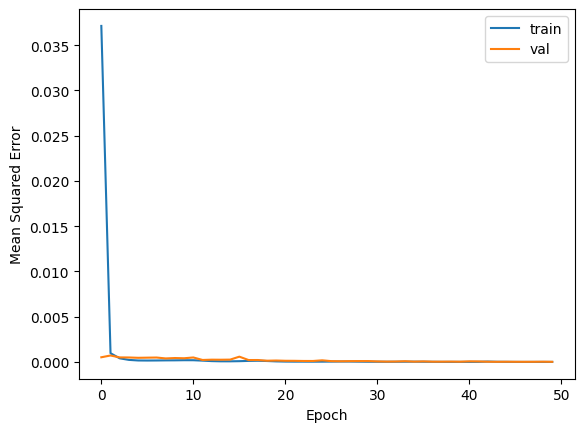

In [14]:
from sklearn.model_selection import train_test_split
import numpy as np

# Split the data into features and target
# Assuming the target column is named 'target'
target_column = 'RainToday_Yes'  # Replace 'target' with the actual target column name
X = data.drop(columns=[target_column]).values  # Convert to NumPy array
y = data[target_column].values  # Convert to NumPy array

# Verify shapes of X and y
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


# **Evaluate the Model**

In [15]:
# Evaluate the model on the validation set
val_mse = model.evaluate(X_val, y_val)
print(f'Validation Mean Squared Error: {val_mse[1]}')


66/66 [==============================] - 0s 2ms/step - loss: 1.6212e-05 - mse: 1.6212e-05
Validation Mean Squared Error: 1.6212459740927443e-05
